# 합성곱 신경망 (convolution neural network)

CNN은 비전 처리에서 많이 응용되는 기술로 뉴럴 넷트워크에 convolution layer라는 것이 추가된다.

합성곱 신경망은 대뇌의 시각 피질 연구에서 시작되었다고 한다.

Convolution layer는 수학적 operation인 convolution에서 원리를 가져왔으며 이미지 처리에 있어 일종의 필터 역할을 한다.

CNN 기술은 이미지 검색, 자율주행, 영상 분류 그리고 음성 인식과 자연어 처리 등의 분야에서 우수한 성능을 보인다.

이 단원에서는 CNN의 수학적 구조를 자세히 알아보기 보다는 적용 예제 중심으로 내용을 체크해 본다.

## Convolution layer

CNN에서 가장 중요한 것은 합성곱 층 (convolution layer)이다.  

일반적인 인공 신경망처럼 합성곱 층에도 뉴런들이 존재한다.

일반적인 인공 신경망에서 층의 뉴런이 모든 입력과 연결 (fully connected) 되었던 것과는 달리, 합성곱 층의 뉴런은 입력 이미지의 모든 픽셀에 한번에 연결되는 것이 아니다.

합성곱 층 뉴런은 입력된 이미지의 일부, 예를 들어, $3\times3$ 크기의 부분 집합에 있는 픽셀들에만 연결된다.

사람이 전체를 보기 힘든 큰 그림을 볼 때 일부를 먼저 시각적으로 보는 것과 비슷하다.

그 뒤에 순차적으로 $3\times3$ 크기의 window를 움직여가며 전체 영역을 모두 스캔한다.

이 window를 종종 filter 혹은 kernel이라고 부르며, 필터링은 결국 그림의 특정한 feature를 골라 내는 방식이다.

Filter를 통해 나온 output은 feature map이라고도 부른다.

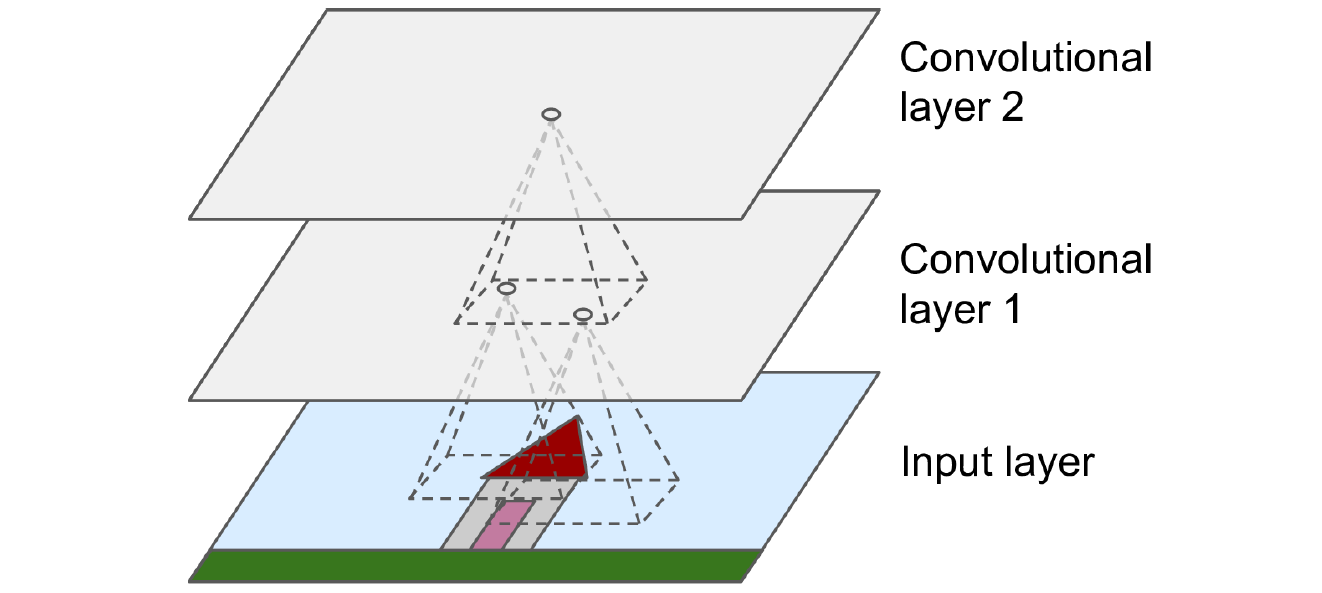

가상의 데이터를 직접 만들어 필터를 적용해 보자.

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [2]:
# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0], 
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0]]
data = np.asarray(data)

# 1은 데이터의 개수, 8,8은 데이터 하나의 크기, 1은 channel의 숫자, 여기서는 흑백을 의미 (RGB의 경우 3)
# (8, 8, 1)이 input shape이 됨
data = data.reshape(1, 8, 8, 1)  

아래 코드에서 ```Conv2D```의 ```kerne_size``` 인자는 수용장 (convolution window)의 크기를 나타낸다.  
$3\times3$이나 $5\times5$ 등의 비교적 작은 크기의 필터가 많이 사용된다.  

```filters``` 인자는 필터의 개수를 나타내며, 이 예제에서는 한 개만 사용되었으나, 필터의 개수를 여러 개로 늘릴 수 있다.  

```input_shape```은 입력 데이터의 shape이며, 아래 코드에서 8,8은 데이터 하나의 크기, 1은 channel의 숫자이다.

In [3]:
# create model
model = Sequential()
# (3,3) 크기의 필터를 하나 이용
model.add(Conv2D(filters = 1, kernel_size = (3,3), input_shape=(8, 8, 1)))

In [4]:
# kernel_size, input_shape_channel, filters
model.layers[0].get_weights()[0].shape

(3, 3, 1, 1)

이 예제에서는 필터를 강제로 지정(```detector```)하여 어떤 결과를 얻게 되는지 살펴본다.

아래 필터는 $3\times3$으로 가운데 수직선이 있는 필터이다.  

이런 가중치를 사용한 뉴런은 가운데 수직선 부분을 제외하고는 입력에 모두 0이 곱하지는 셈이며 나머지 부분을 무시하는 것처럼 될 것이다.

In [5]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]

weights = [np.asarray(detector), np.asarray([0.0])]   # 3*3 fileter와 편향(bias)
print(weights)

[array([[[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]],


       [[[0]],

        [[1]],

        [[0]]]]), array([0.])]


모형에 강제로 weight를 설정할 것이다.

In [6]:
# store the weights in the model
model.set_weights(weights)
for layer in model.layers: print(layer.get_weights()) 

[array([[[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]],


       [[[0.]],

        [[1.]],

        [[0.]]]], dtype=float32), array([0.], dtype=float32)]


In [7]:
# apply filter to input data
yhat = model.predict(data)

# 보기 좋게 print 하기 위해
for r in range(yhat.shape[1]):
    # print each column in the row
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

1/1 [==============================] - 0s 49ms/step
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]
[0.0, 0.0, 3.0, 3.0, 0.0, 0.0]


이번에는 가로 필터를 넣어보겠다.

In [8]:
model2 = Sequential()
model2.add(Conv2D(filters = 1, kernel_size = (3,3), input_shape=(8, 8, 1)))

detector2 = [[[[0]],[[0]],[[0]]],
             [[[1]],[[1]],[[1]]],
             [[[0]],[[0]],[[0]]]]

weights2 = [np.asarray(detector2), np.asarray([0.0])]
model2.set_weights(weights2)
yhat2 = model2.predict(data)
for r in range(yhat2.shape[1]):
    # print each column in the row
    print([yhat2[0,r,c,0] for c in range(yhat2.shape[2])])

1/1 [==============================] - 0s 20ms/step
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]
[0.0, 1.0, 2.0, 2.0, 1.0, 0.0]


실제 사진 이미지에 세로 필터와 가로 필터를 적용하면 다음과 같다.

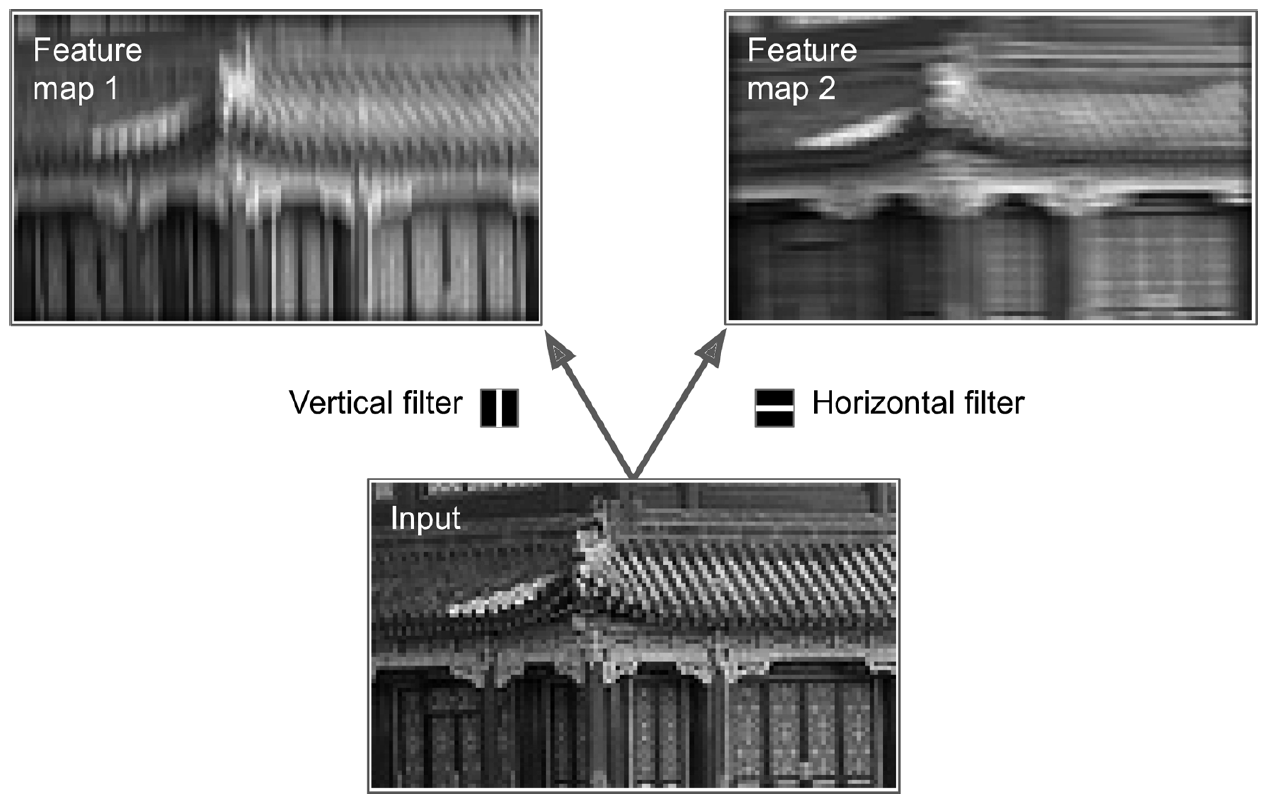

실제 CNN을 구현할 때는 가로 필터나 세로 필터 같은 특정 필터를 적용하는 것은 아니다.  
필터들의 weight 값은 훈련을 통해 fitting 된다.

### 간단한 예제

In [9]:
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape
batch_size, height, width, channels

(2, 427, 640, 3)

In [10]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
# 마지막 index가 채널
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

아래에서 ```tf.nn.conv2d```는 ```tf.keras.layers.Conv2D```와 거의 같은 것이라고 보면 된다.

In [11]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

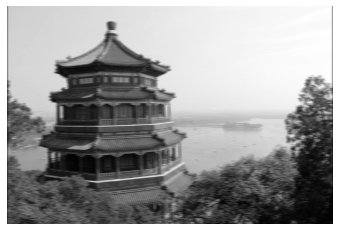

In [12]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

In [13]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

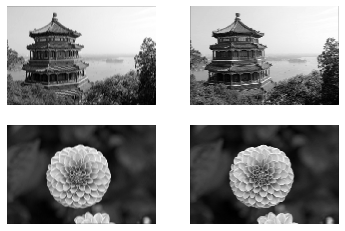

In [14]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

### MNIST 예제

In [15]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [16]:
#download mnist data and split into train and test sets
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

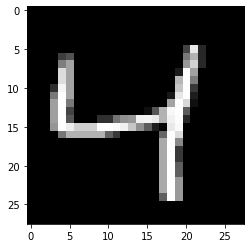

In [17]:
plt.imshow(train_images[2], cmap='gray')
plt.show()

In [18]:
train_labels[2]

4

In [19]:
train_images = train_images.reshape((60000, 28, 28, 1))  #60000개의 28*28 image, 1채널
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화
train_images, test_images = train_images / 255.0, test_images / 255.0

CNN은 배치(batch) 크기를 제외하고 (이미지 높이, 이미지 너비, 컬러 채널) 크기의 텐서(tensor)를 입력으로 받는다. 

MNIST 데이터는 (흑백 이미지이기 때문에) 컬러 채널(channel)이 하나지만 컬러 이미지는 (R,G,B) 세 개의 채널을 가진다.

이 예에서는 MNIST 이미지 포맷인 (28, 28, 1) 크기의 입력을 처리하는 CNN을 정의한다. 

이 값을 첫 번째 층의 input_shape 매개변수로 전달합니다.

In [20]:
#create model
model = keras.models.Sequential()

모형에 layer들을 추가하자.

64종류의 필터를 이용하는 Convolution layer를 만들어 보겠다.

커널 크기는 $3\times3$으로 하였다.

아래 layer를 지나면 $26 \times 26 \times 64$의 output이 생성된다.

* 원래 $28\times28$의 그림이 필터를 거치면서, 위-아래-왼쪽-오른쪽에서 한 칸씩 줄어, 크기는 $26\times26$로 줄어들게 된다.

* 그리고 64개의 필터를 거치면서 64개의 특성맵이 만들어 진다.

In [21]:
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(28,28,1)))  

아래 코드에서 하나의 convolution layer를 더 추가하겠다.

이번에는 32종류의 필터를 이용한다.

아래 layer를 지나면 $24\times24\times32$의 output이 생성된다.

이 과정에서 이전 층에서 출력된 특성 맵들의 결과는 하나로 합쳐지게 된다.

In [22]:
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

In [23]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 첫번째 layer의 parameter 숫자. 3*3은 커널, 1은 편향(bias) - 특성맵의 밝기를 조정하는 다이얼 같은 개념
(3*3 + 1) * 64

640

In [26]:
# 두번째 layer의 parameter 숫자, 첫번째 layer의 총 64 종류 output 채널에 대해 각각 적용되는 커널이 존재
(3*3*64 + 1) * 32

18464

In [27]:
# Flatten의 output 수
24* 24* 32

18432

간단하게 ```keras.layers.Conv2D```를 임시로 생성하여, 출력 결과를 대략적으로 살펴보자.

처음 2개의 레이어는 Conv2D 레이어로 2차원 행렬인 입력 이미지를 처리할 컨볼루션 레이어이다.

첫 번째 레이어의 64와 두 번째 레이어의 32는 각 레이어의 노드 수를 나타낸다. 

이 숫자는 데이터 세트의 크기에 따라 더 높거나 낮게 조정할 수 있다. 

kernel_size는 컨볼루션에 대한 필터 행렬의 크기이다. 따라서 커널 크기가 3이면 3x3 필터 행렬을 갖게된다. 

즉 첫 번째 레이어는 3x3 크기의 64개의 필터를 갖는다.

In [28]:
temp = keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:2])

In [29]:
temp

<tf.Tensor: shape=(2, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

In [30]:
keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1))(train_images[:1])

<tf.Tensor: shape=(1, 26, 26, 64), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.       

모델을 컴파일할 때 타겟 값이 0부터 9까지의 정수로 이루어져 있기 때문에 (sparse category), ```sparse_categorical_crossentropy```를 loss function으로 이용한다.

In [31]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
#train the model
model.fit(train_images[:20000], train_labels[:20000], epochs=5)

Epoch 1/5
625/625 [==============================] - 13s 20ms/step - loss: 0.2242 - accuracy: 0.9336
Epoch 2/5
625/625 [==============================] - 13s 20ms/step - loss: 0.0694 - accuracy: 0.9783
Epoch 3/5
625/625 [==============================] - 13s 21ms/step - loss: 0.0425 - accuracy: 0.9870
Epoch 4/5
625/625 [==============================] - 13s 20ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 5/5
625/625 [==============================] - 13s 20ms/step - loss: 0.0188 - accuracy: 0.9938


아래 코드에서 ```result```는 softmax의 결과로 확률값이기 때문에 이를 클래스로 변환하기 위해 ```np.argmax```가 사용되었다.

In [33]:
results = model.predict(test_images[:30])
for result in results:
    print(np.argmax(result), end=" ")

1/1 [==============================] - 0s 34ms/step
7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 

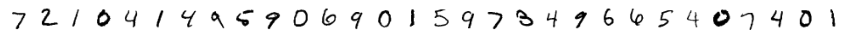

In [34]:
(original_train_images, original_train_labels), (original_test_images, original_test_labels) = keras.datasets.mnist.load_data()
fig, ax = plt.subplots(1, 30, figsize=(15,15))
for i in range(30):
    ax[i].imshow(original_test_images[i].reshape(28, 28), cmap='binary')
    ax[i].axis('off')

### 패딩과 스트라이드

Convolution filter를 적용하면, 가로, 세로가 2 칸씩 줄어들게 된다.  
즉, $8\times8$의 이미지가 convolution layer를 통과하면 $6\times6$의 이미지가 된다.  
만약 줄어드는 것이 마음에 들지 않으면, 원 이미지의 주위에, 0을 추가할 수 있다.  
그러면 원 이미지가 $10\times10$이 되므로 convolution layer를 통과하면 $8\times8$이 된다.  
이를 제로 패딩 (zero padding)이라 한다.
```keras.layers.Conv2D```에서는 ```padding = "same"```으로 두어 구현할 수 있다.

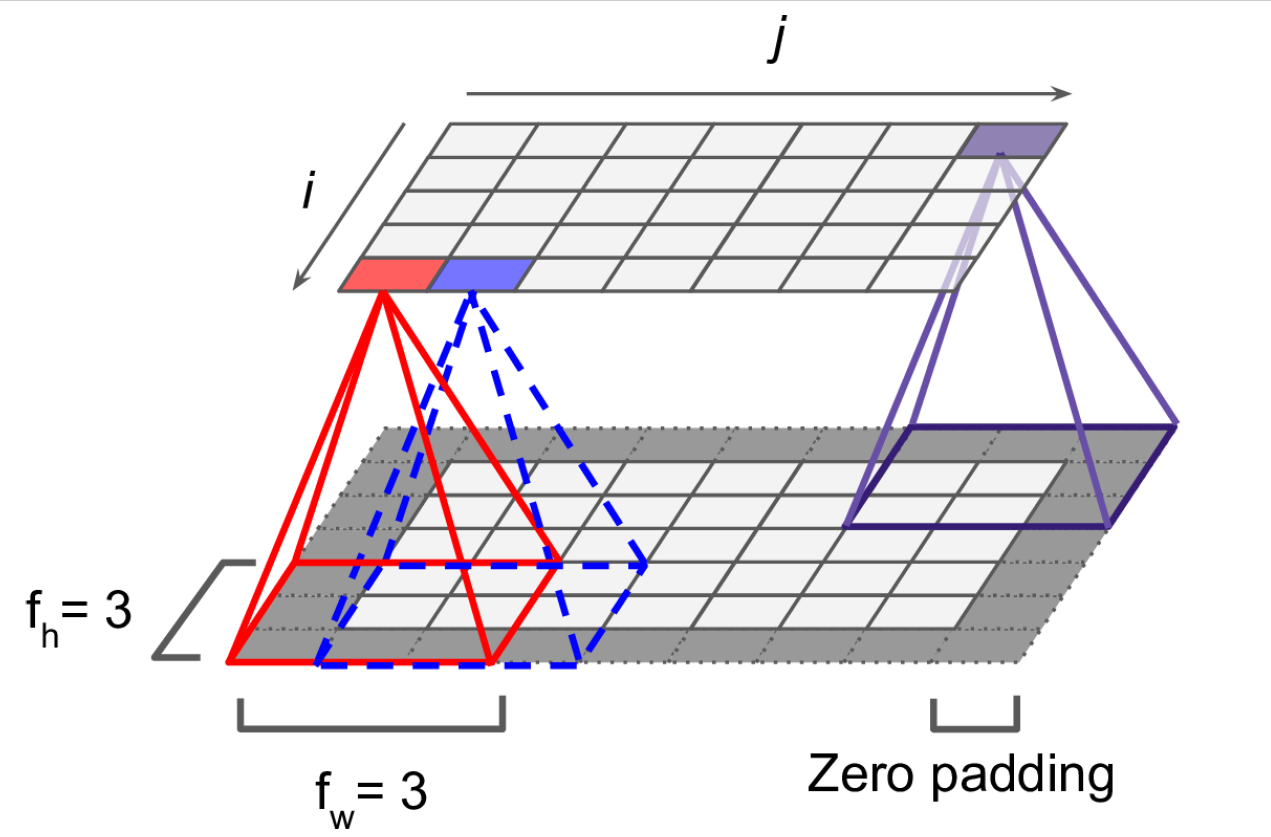

때로는 수용장 사이에 간격을 두어 입력층을 훨씬 작은 출력으로 변환할 수도 있다.  
이 간격을 스트라이드 (stride)라고 한다.  
이렇게 하면 모형의 계산 복잡도를 낮출 수 있다.
```keras.layers.Conv2D```에서는 ```strides``` 인자에 두 정수를 가지는 tuple이나 리스트를 입력한다.  
각 정수는 높이와 너비에 대한 stride 값을 나타낸다.

예를 들어 다음과 같은 모형을 생각할 수 있다.

In [35]:
model_modified = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding = "same", input_shape=(28,28,1)),
    keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', strides = (2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 10, activation="Softmax")
])

In [36]:
model_modified.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 73,194
Trainable params: 73,194
Non-trainable params: 0
_________________________________________________________________


### Multiple feature map

인풋 그림은 종종 여러 색깔로 이루어져있다. 가장 간단한 형태는 RGB의 세 가지 채널을 가지는 것이다.  

이런 경우 각 채널에 대해, 모든 필터들이 각각 적용된다.  

* 즉, 입력 채널이 몇이든지, output의 특성 맵의 수는 오로지 filter의 개수에 의해 결정된다.

Output으로 출력할 때는 input 채널의 filter 적용 결과를 동일한 출력 행과 열의 값에 대해 합산한 후 출력한다.

In [37]:
# 3 채널 이미지
images[0].shape

(427, 640, 3)

In [38]:
keras.layers.Conv2D(filters=5, kernel_size=3, input_shape=images[0].shape)(images[:1]).shape

TensorShape([1, 425, 638, 5])

## 풀링 층

풀링 층은 계산량과 메모리 사용량, 파라미터 수를 줄이기 위해 입력 이미지의 subsample을 만드는 것이다.

이는 과대적합 (overfitting)의 위험을 줄여준다.

풀링 뉴런은 가중치가 따로 없고, 최대나 평균 같은 합산 함수를 이용해 입력값을 더한다.

```MaxPool2D``` (```MaxPooing2D```), ```AvgPooling2D``` 등이 있다.

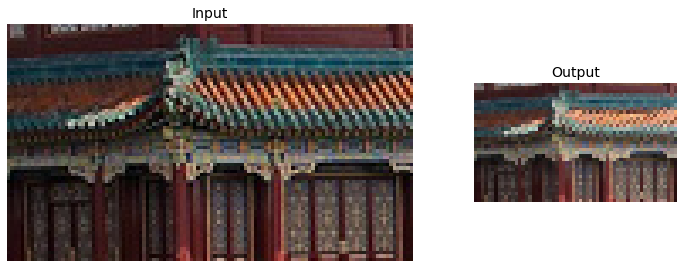

In [39]:
import matplotlib as mpl


def crop(images):
    return images[150:220, 130:250]


max_pool = keras.layers.MaxPool2D(pool_size=2)
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [41]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [42]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 576)              

In [44]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1435 - accuracy: 0.9549
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0463 - accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0334 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0244 - accuracy: 0.9928
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0203 - accuracy: 0.9937


In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0301 - accuracy: 0.9918 - 1s/epoch - 3ms/step


In [46]:
print(test_acc)

0.9918000102043152


###  CNN 구조

전형적인 CNN 구조는 합성곱 층을 몇 개 쌓고, 각각 ReLu 층을 그 뒤에 두고, 그 다음에 풀링층을 쌓고, 그 다음에 또 합성곱 층을 몇 개 더 쌓고 그 다음에 풀링 층을 다시 쌓는 식이다.

네트워크를 통과할수록 이미지는 작아지지만 합성곱 층 때문에 일반적으로 점점 깊어져 더 많은 특성 맵을 지닌다.

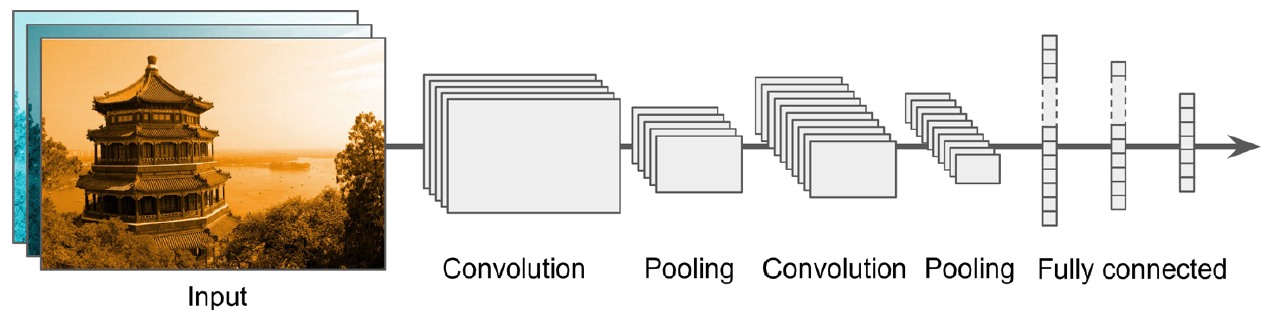

In [47]:
## 예제 코드

model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

지난 몇년간 이 기본구조에서 많은 변종이 개발되어 많은 성과를 이끌어 냈다.

대표적으로는 LeNet-5 구조, AlexNet, GoogLeNet, ResNet 등이 있다.